# CosmoSLICS simulation testing
07/2023                                                                       

In [1]:
%matplotlib inline                                                            
%load_ext autoreload                                                          
%autoreload 2                                                                                                                                                 

In [2]:
import matplotlib.pylab as plt
import os
from cs_util import cat as cs_cat

In [3]:
import sp_peaks           
print(f"sp_peaks version = {sp_peaks.__version__}")

from sp_peaks import slics

sp_peaks version = 0.0.1


In [4]:
root_directory = "/n17data/tersenov/SLICS/Cosmo_DES"

In [5]:
cat_path = f"{root_directory}/06_f/LOS3/DES_MocksCat_06_f_4_Bin3_LOS3_R19.dat"

In [6]:
# Load catalogue, all columns
dat = slics.read_catalogue(cat_path)

In [7]:
# DEBUG
dat_comb = dat

In [10]:
# Print column names
print(dat.dtype.names)

('RA',
 'Dec',
 'e1_data',
 'e2_data',
 'w',
 'redshift_true_sim',
 'gamma1_sim',
 'gamma2_sim',
 'kappa_sim',
 'S_metacal_data')

In [11]:
# Print first line
print(dat[0])

RA,Dec,e1_data,e2_data,w,redshift_true_sim,gamma1_sim,gamma2_sim,kappa_sim,S_metacal_data
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9.9850721,0.83404565,-0.3871837,-0.093102939,1.0,0.81983972,0.011937537,0.00051228399,-0.010907983,-0.17440903


In [12]:
# Load only essential columns
dat_ess = slics.read_catalogue(cat_path, all_col=False)

In [12]:
from astropy.table import vstack
x = vstack([dat, dat])

In [16]:
len(dat)

412196

In [13]:
print(dat_ess[0])

RA,Dec,e1_data,e2_data,redshift_true_sim
float64,float64,float64,float64,float64
9.9850721,0.83404565,-0.3871837,-0.093102939,0.81983972


In [31]:
# Combine all four redshift bins for given cosmo ID, line of sight, and tile number
dat_comb = slics.read_multiple_catalogues(
    root_directory,
    cosmo_id="fid_f",
    zbins=None,
    lsos=[2],
    tiles=[5],
    combine="add",
    verbose=True,
)

Reading catalogue fid_f/LOS2/DES_MocksCat_fid_f_4_Bin1_LOS2_R5.dat...
Reading catalogue fid_f/LOS2/DES_MocksCat_fid_f_4_Bin2_LOS2_R5.dat...
Reading catalogue fid_f/LOS2/DES_MocksCat_fid_f_4_Bin3_LOS2_R5.dat...
Reading catalogue fid_f/LOS2/DES_MocksCat_fid_f_4_Bin4_LOS2_R5.dat...


In [23]:
len(dat_comb)

1236929

In [52]:
# Read CFIS redshift distribution (blind version "A", ShapePipe)
dndz_CFIS_path = "/n17data/mkilbing/astro/data/CFIS/v1.0/nz/dndz_SP_A.txt"
z_centers_ext, dndz_ext, z_edges_ext = cs_cat.read_dndz(dndz_CFIS_path)

nz = len(z_edges_ext)
print(len(z_centers_ext), len(dndz_ext), len(z_edges_ext))

200 200 201


In [49]:
dndz_slics, z_edges_slics = np.histogram(dat_comb["redshift_true_sim"], bins=z_edges_CFIS)

In [53]:
# CHeck that z
max(z_edges_slics - z_edges_ext)

0.0

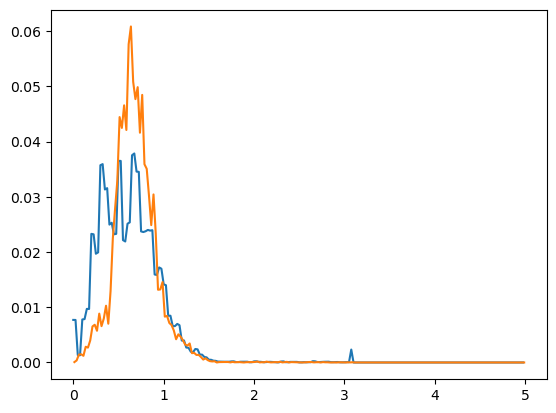

In [54]:
plt.plot(res[1][:-1], res[0] / sum(res[0]), '-')
plt.plot(z_centers_ext, dndz_ext / sum(dndz_ext), '-')

In [35]:
res[1][np.where(res[0] == 0)]

array([3.1  , 3.125, 3.15 , 3.175, 3.2  , 3.225, 3.25 , 3.275, 3.3  ,
       3.325, 3.35 , 3.375, 3.4  , 3.425, 3.45 , 3.475, 3.5  , 3.525,
       3.55 , 3.575, 3.6  , 3.625, 3.65 , 3.675, 3.7  , 3.725, 3.75 ,
       3.775, 3.8  , 3.825, 3.85 , 3.875, 3.9  , 3.925, 3.95 , 3.975,
       4.   , 4.025, 4.05 , 4.075, 4.1  , 4.125, 4.15 , 4.175, 4.2  ,
       4.225, 4.25 , 4.275, 4.3  , 4.325, 4.35 , 4.375, 4.4  , 4.425,
       4.45 , 4.475, 4.5  , 4.525, 4.55 , 4.575, 4.6  , 4.625, 4.65 ,
       4.675, 4.7  , 4.725, 4.75 , 4.775, 4.8  , 4.825, 4.85 , 4.875,
       4.9  , 4.925, 4.95 , 4.975])

In [37]:
z_max = 1.8

In [55]:
idx_z_max = np.where(z_edges_ext < z_max)                               
dndz_ext = dndz_ext[idx_z_max]                                          
dndz_slics = dndz_slics[idx_z_max] 

In [56]:
probability = dndz_ext / dndz_slics 

In [57]:
probability

2.8594946127434253e-07
1.574042958404797e-06
3.4526586550599785e-05
3.6643725378022684e-05
5.022913194677407e-06
1.1714737205167959e-05
8.970696531364506e-06
1.3304558529801936e-05
9.060341138639804e-06
9.521187042241408e-06
9.429373093166353e-06
